# Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

# Creating Knot Coordinate Files

In [2]:
coords=np.loadtxt('trefoil_lattice.txt')
coords=np.delete(coords, [-1, -2, -3, -4, -5], 0)

first, last = coords[0], coords[-1]

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(coords[0, 0], coords[0, 1], coords[0, 2], 'o', color='green', ms=12)
ax.plot(coords[-1, 0], coords[-1, 1], coords[-1, 2], 'o', color='red', ms=12)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], 'o-')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


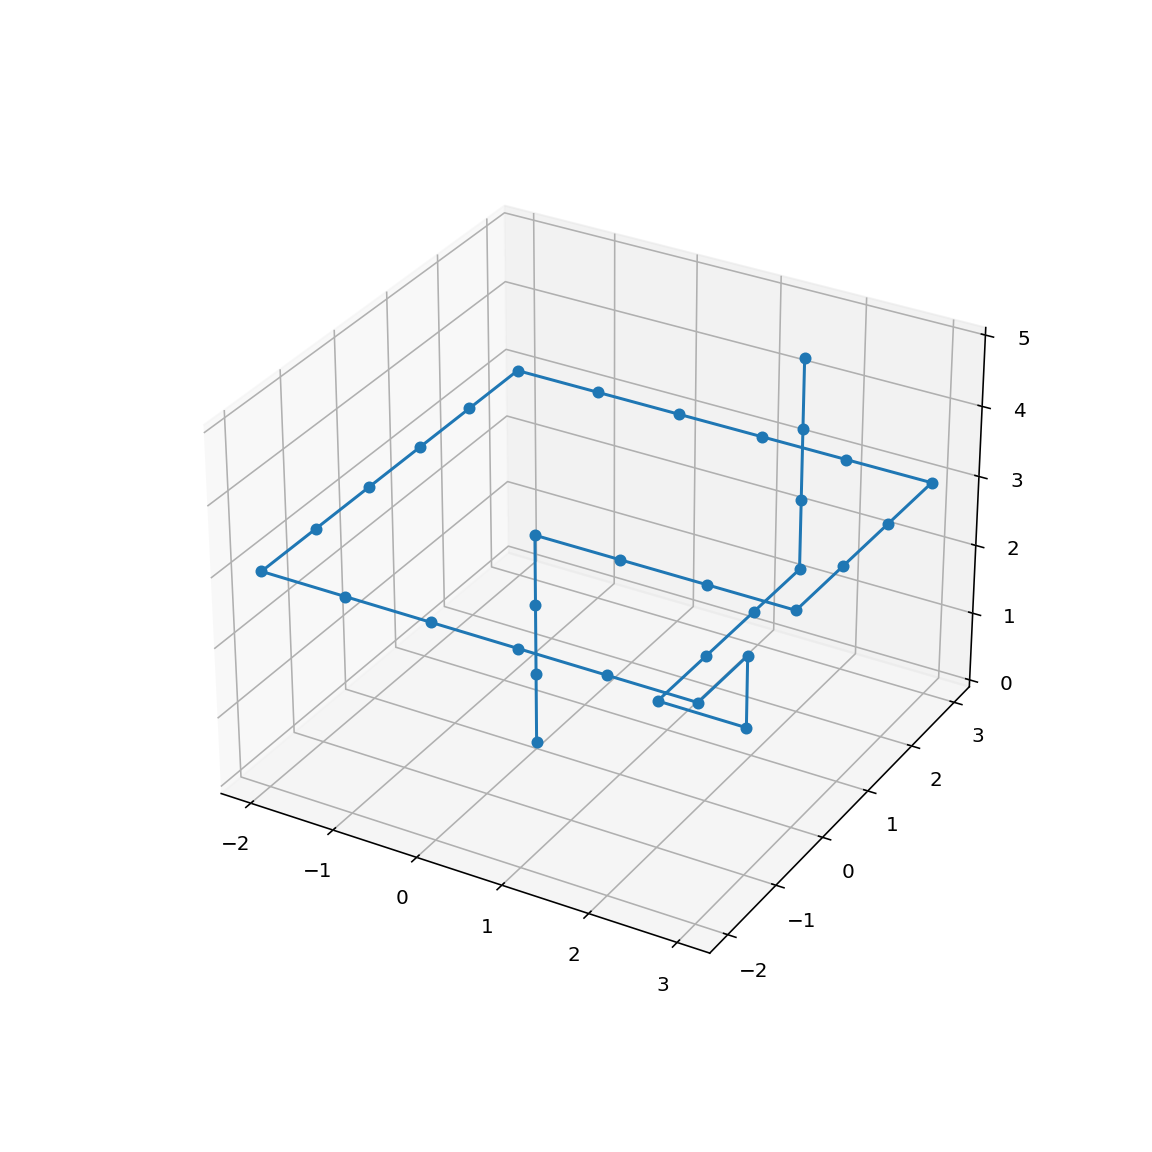

34


In [114]:
coords=np.loadtxt('knot.dat')

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
print(len(coords))
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], marker='o', markersize=5)

In [115]:
morecoords=np.copy(coords)
idx=1
for i in range(len(coords)-1):
    pt1, pt2 = coords[i], coords[i+1]
    pt3, pt4 = (2*pt1+pt2)/3, (pt1+2*pt2)/3
    morecoords = np.insert(morecoords, idx, [pt3, pt4], axis=0)
    idx+=3
morecoords*=3

<IPython.core.display.Javascript object>


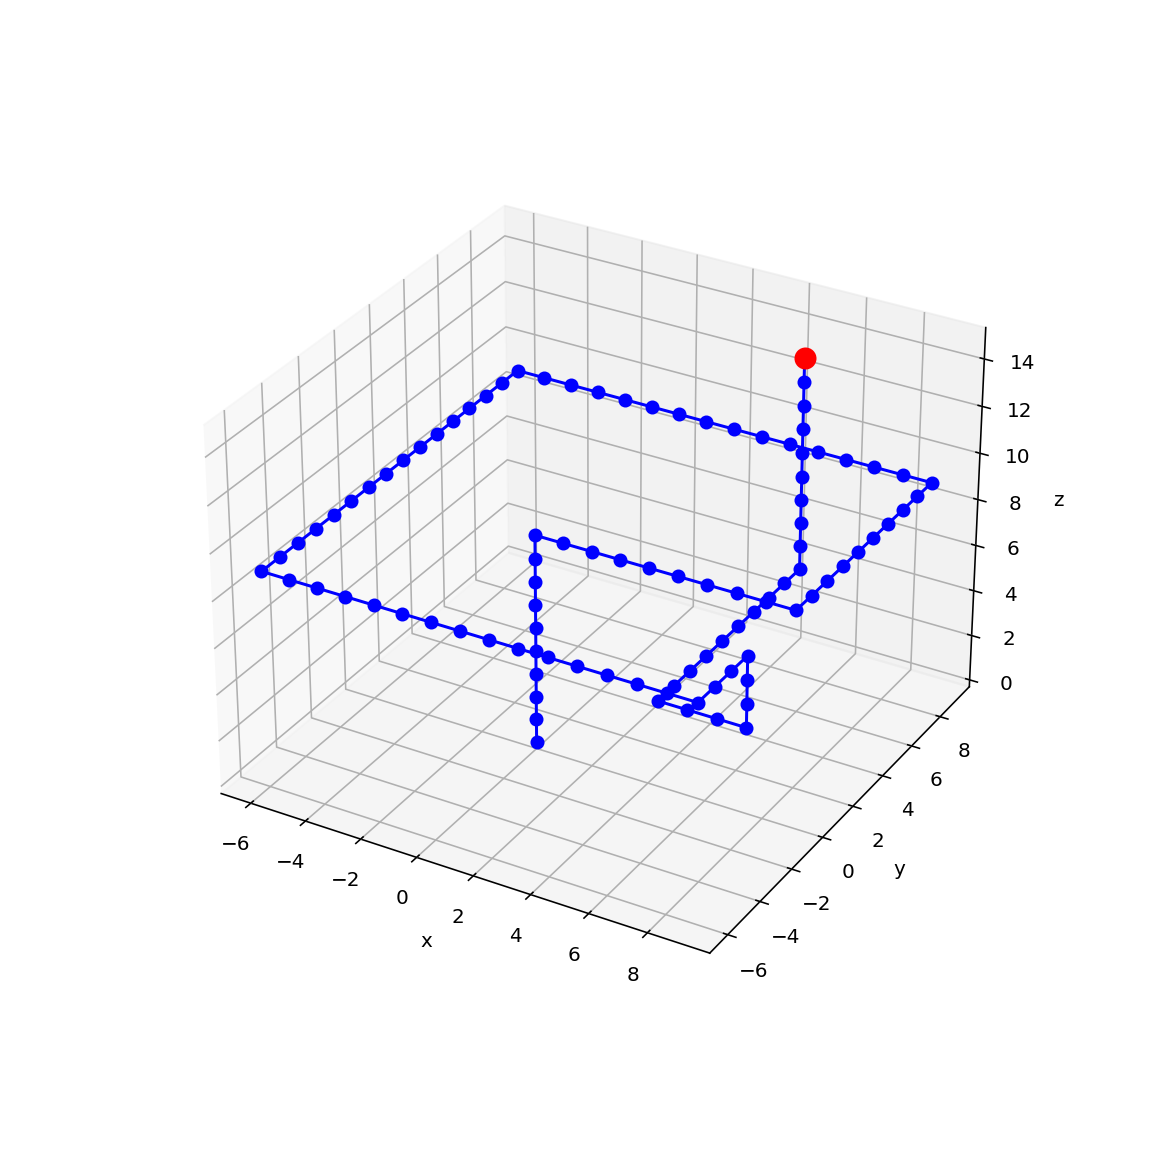

In [116]:
%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot3D(morecoords[:,0], morecoords[:,1], morecoords[:,2], 'bo-')
ax.plot3D(morecoords[-1,0], morecoords[-1,1], morecoords[-1,2], 'ro', ms=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

np.savetxt('garcoords_big.txt', morecoords)

In [117]:
for i in range(30):
    first, last = morecoords[0], morecoords[-1]
    morecoords=np.insert(morecoords, 0, [first[0]+1.122, first[1], first[2]], axis=0)
    morecoords=np.insert(morecoords, len(morecoords), [last[0]+1.122, last[1], last[2]], axis=0)
    
for i in range(70):
    first, last = morecoords[0], morecoords[-1]
    morecoords=np.insert(morecoords, 0, [first[0], first[1], first[2]+1.122], axis=0)
    morecoords=np.insert(morecoords, len(morecoords), [last[0], last[1], last[2]-1.122], axis=0)
    
np.savetxt('garcoords_full.txt', morecoords)
    


<IPython.core.display.Javascript object>


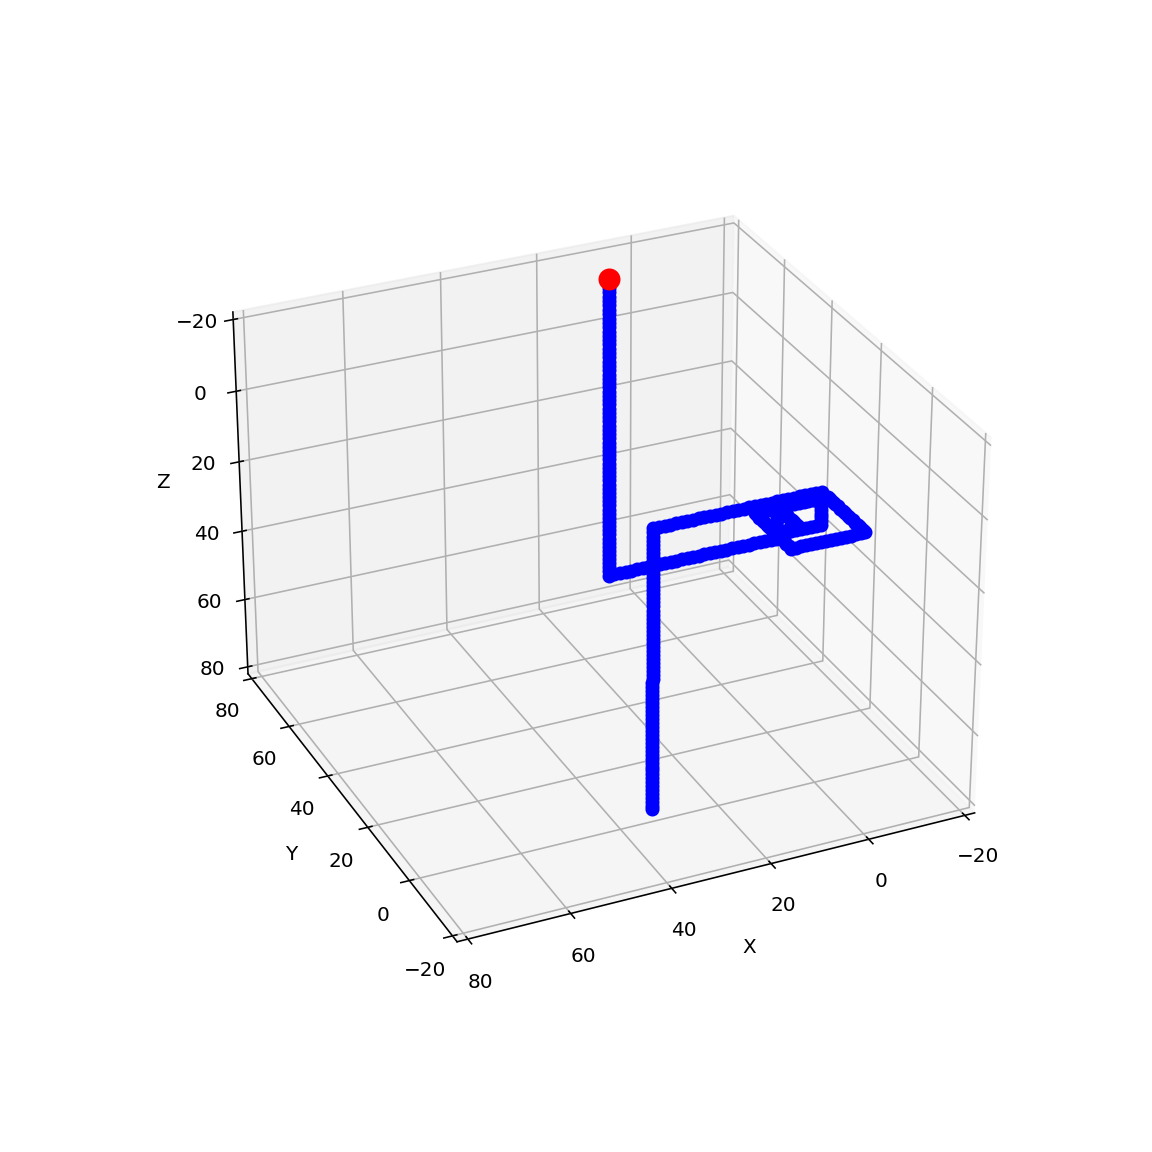

[(-20.0, 80.0), Text(0.5, 0, 'Z')]

In [118]:
%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot3D(morecoords[:,0], morecoords[:,1], morecoords[:,2], 'bo-')
ax.plot3D(morecoords[-1,0], morecoords[-1,1], morecoords[-1,2], 'ro', ms=10)
ax.set(xlim3d=(-20, 80), xlabel='X')
ax.set(ylim3d=(-20, 80), ylabel='Y')
ax.set(zlim3d=(-20, 80), zlabel='Z')

In [13]:
for i in range(10):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1]+1.0, last[2]], axis=0)

for i in range(10):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1], first[2]-1.0], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1], last[2]-1.0], axis=0)
    
for i in range(20):
    first, last = coords[0], coords[-1]
    coords=np.insert(coords, 0, [first[0], first[1]-1.0, first[2]], axis=0)
    coords=np.insert(coords, len(coords), [last[0], last[1]+1.0, last[2]], axis=0)
    
coords*=(2)**(1/6)

<IPython.core.display.Javascript object>


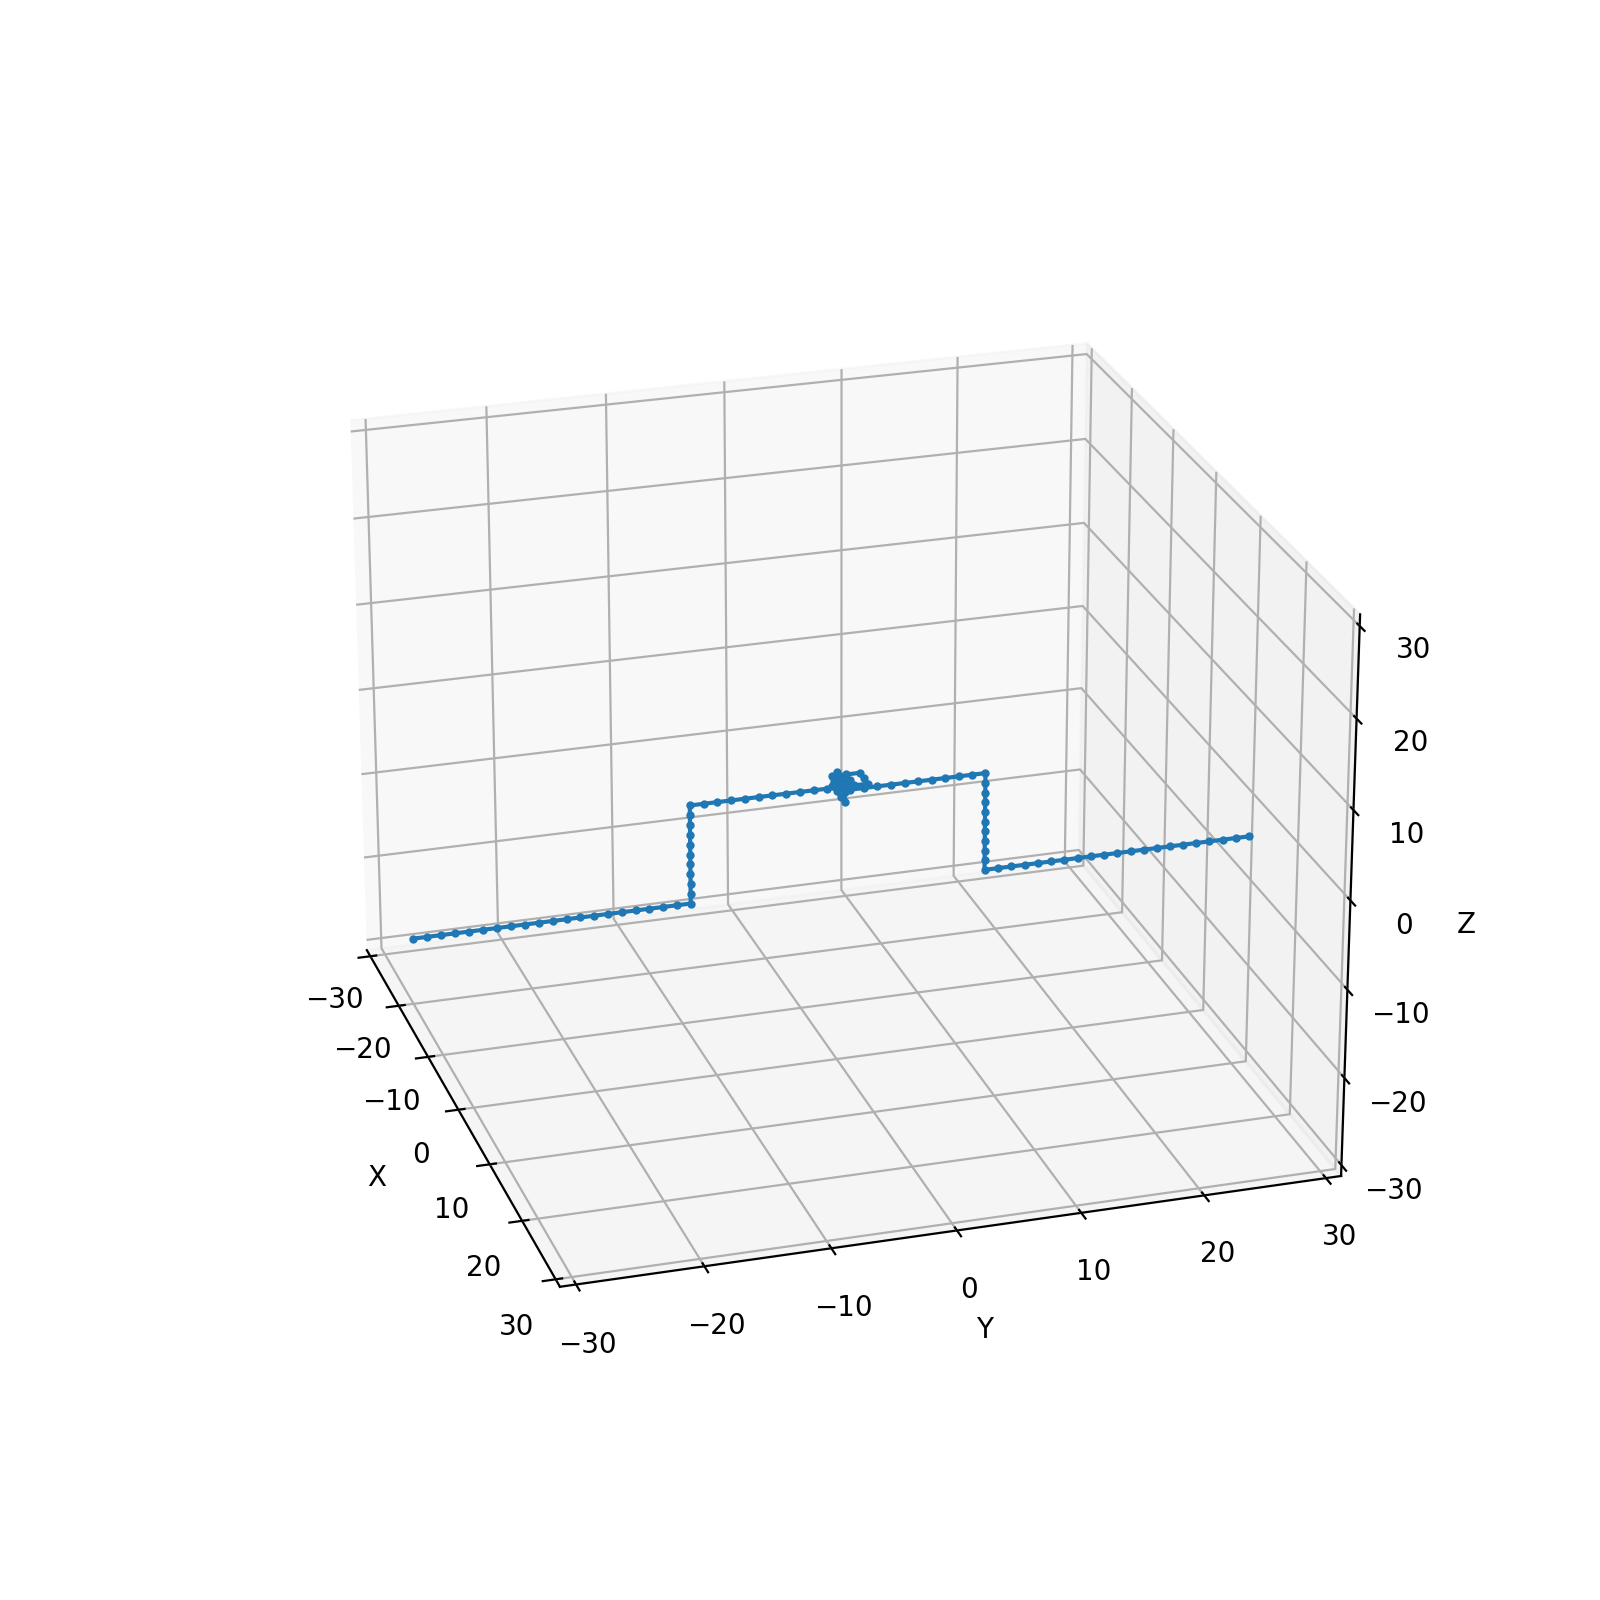

[(-30.0, 30.0), Text(0.5, 0, 'Z')]

In [14]:
%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], marker='o', markersize=2)
ax.set(xlim3d=(-30, 30), xlabel='X')
ax.set(ylim3d=(-30, 30), ylabel='Y')
ax.set(zlim3d=(-30, 30), zlabel='Z')

#np.savetxt('trefoil_short_loose.txt', coords, fmt='%13.3f')

<IPython.core.display.Javascript object>


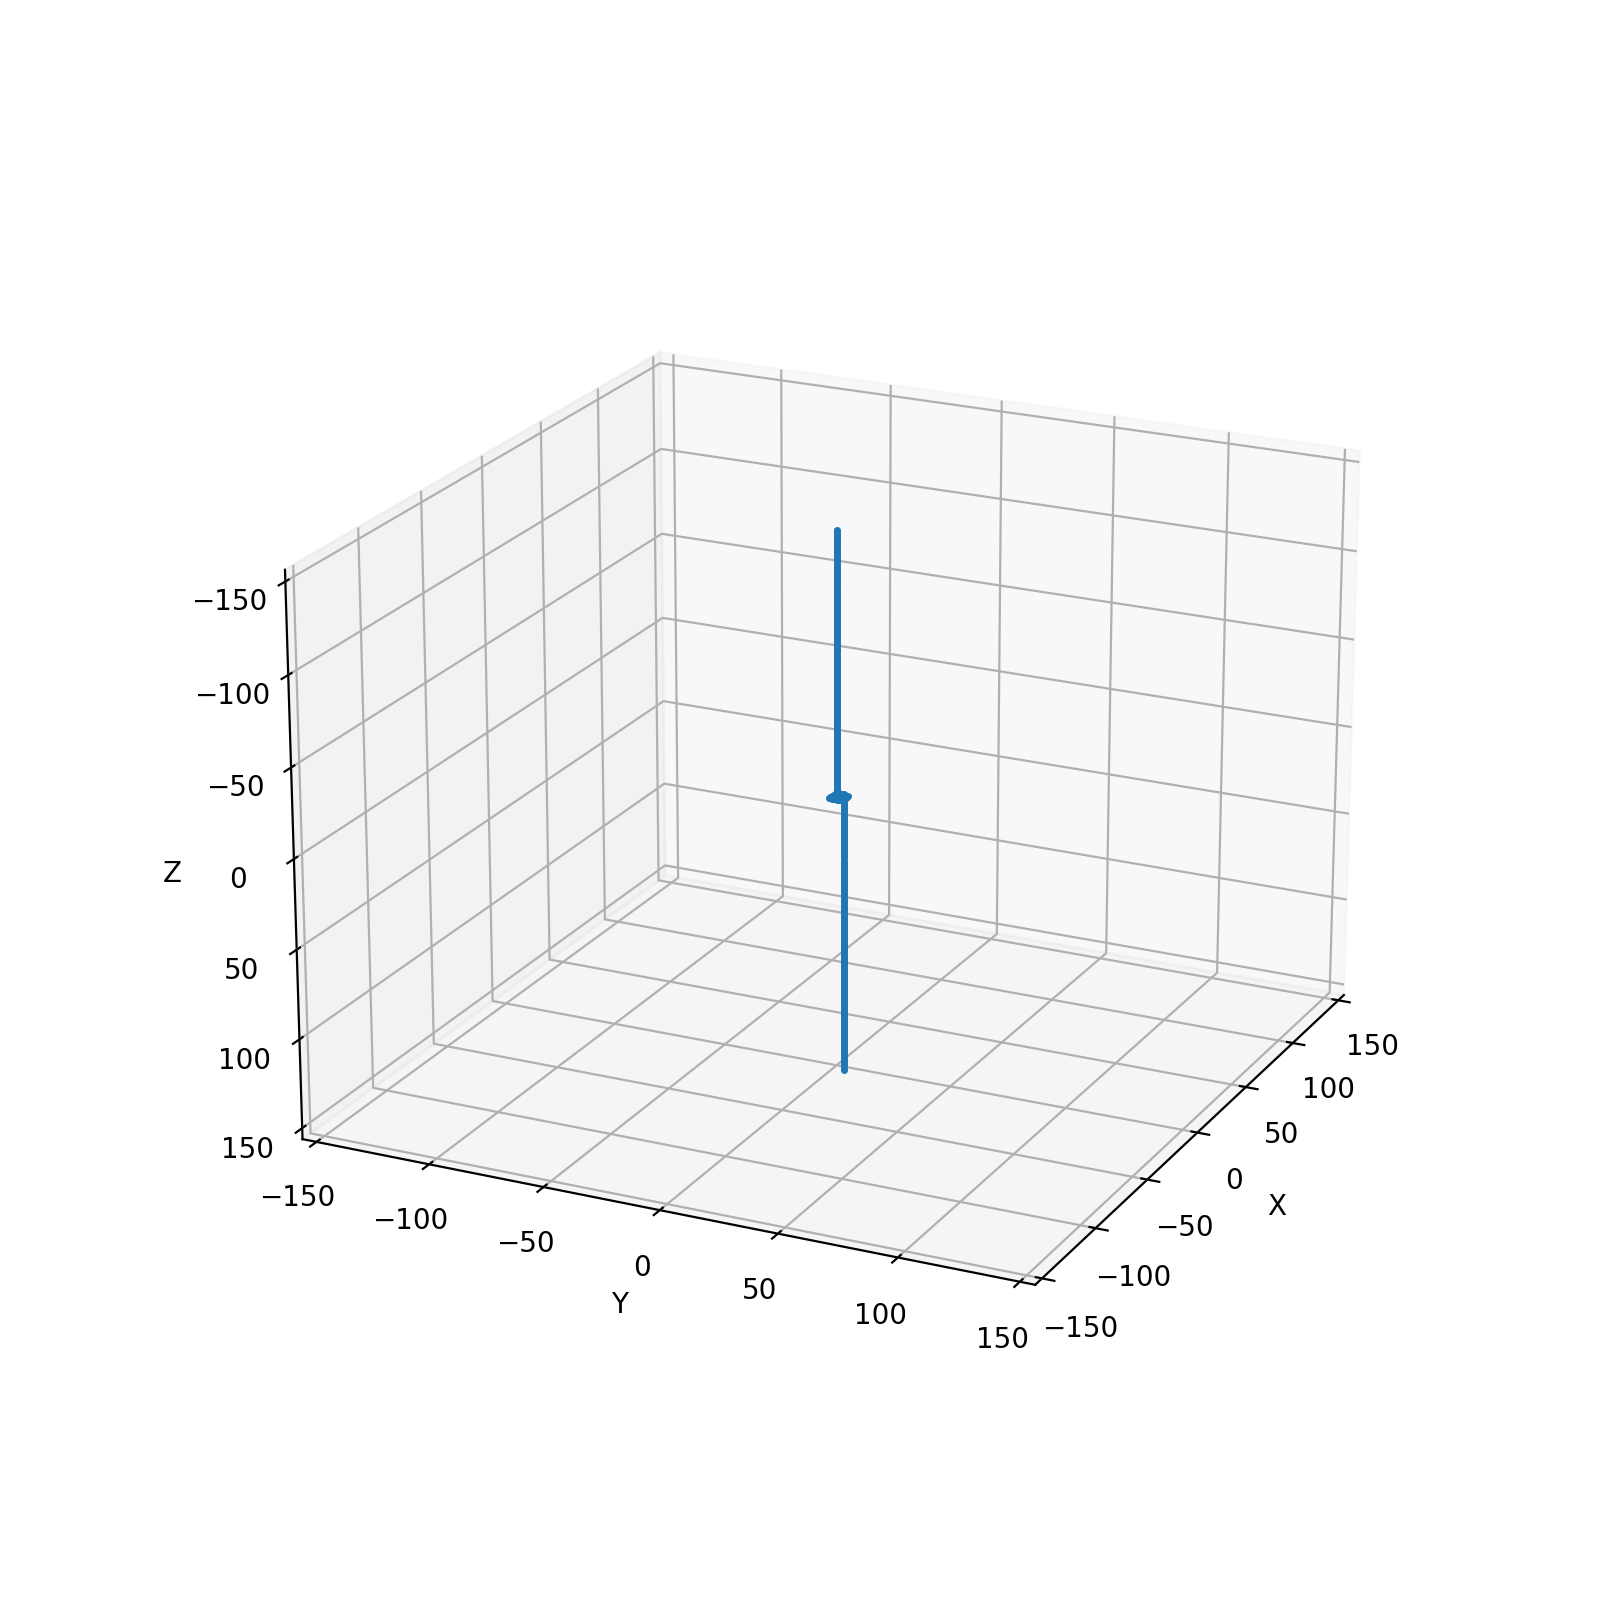

[(-150.0, 150.0), Text(0.5, 0, 'Z')]

In [10]:
gcoord=np.loadtxt('knot5.dat')

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(gcoord[:, 0], gcoord[:, 1], gcoord[:, 2], marker='o', markersize=1.5)
ax.set(xlim3d=(-150, 150), xlabel='X')
ax.set(ylim3d=(-150, 150), ylabel='Y')
ax.set(zlim3d=(-150, 150), zlabel='Z')

<IPython.core.display.Javascript object>


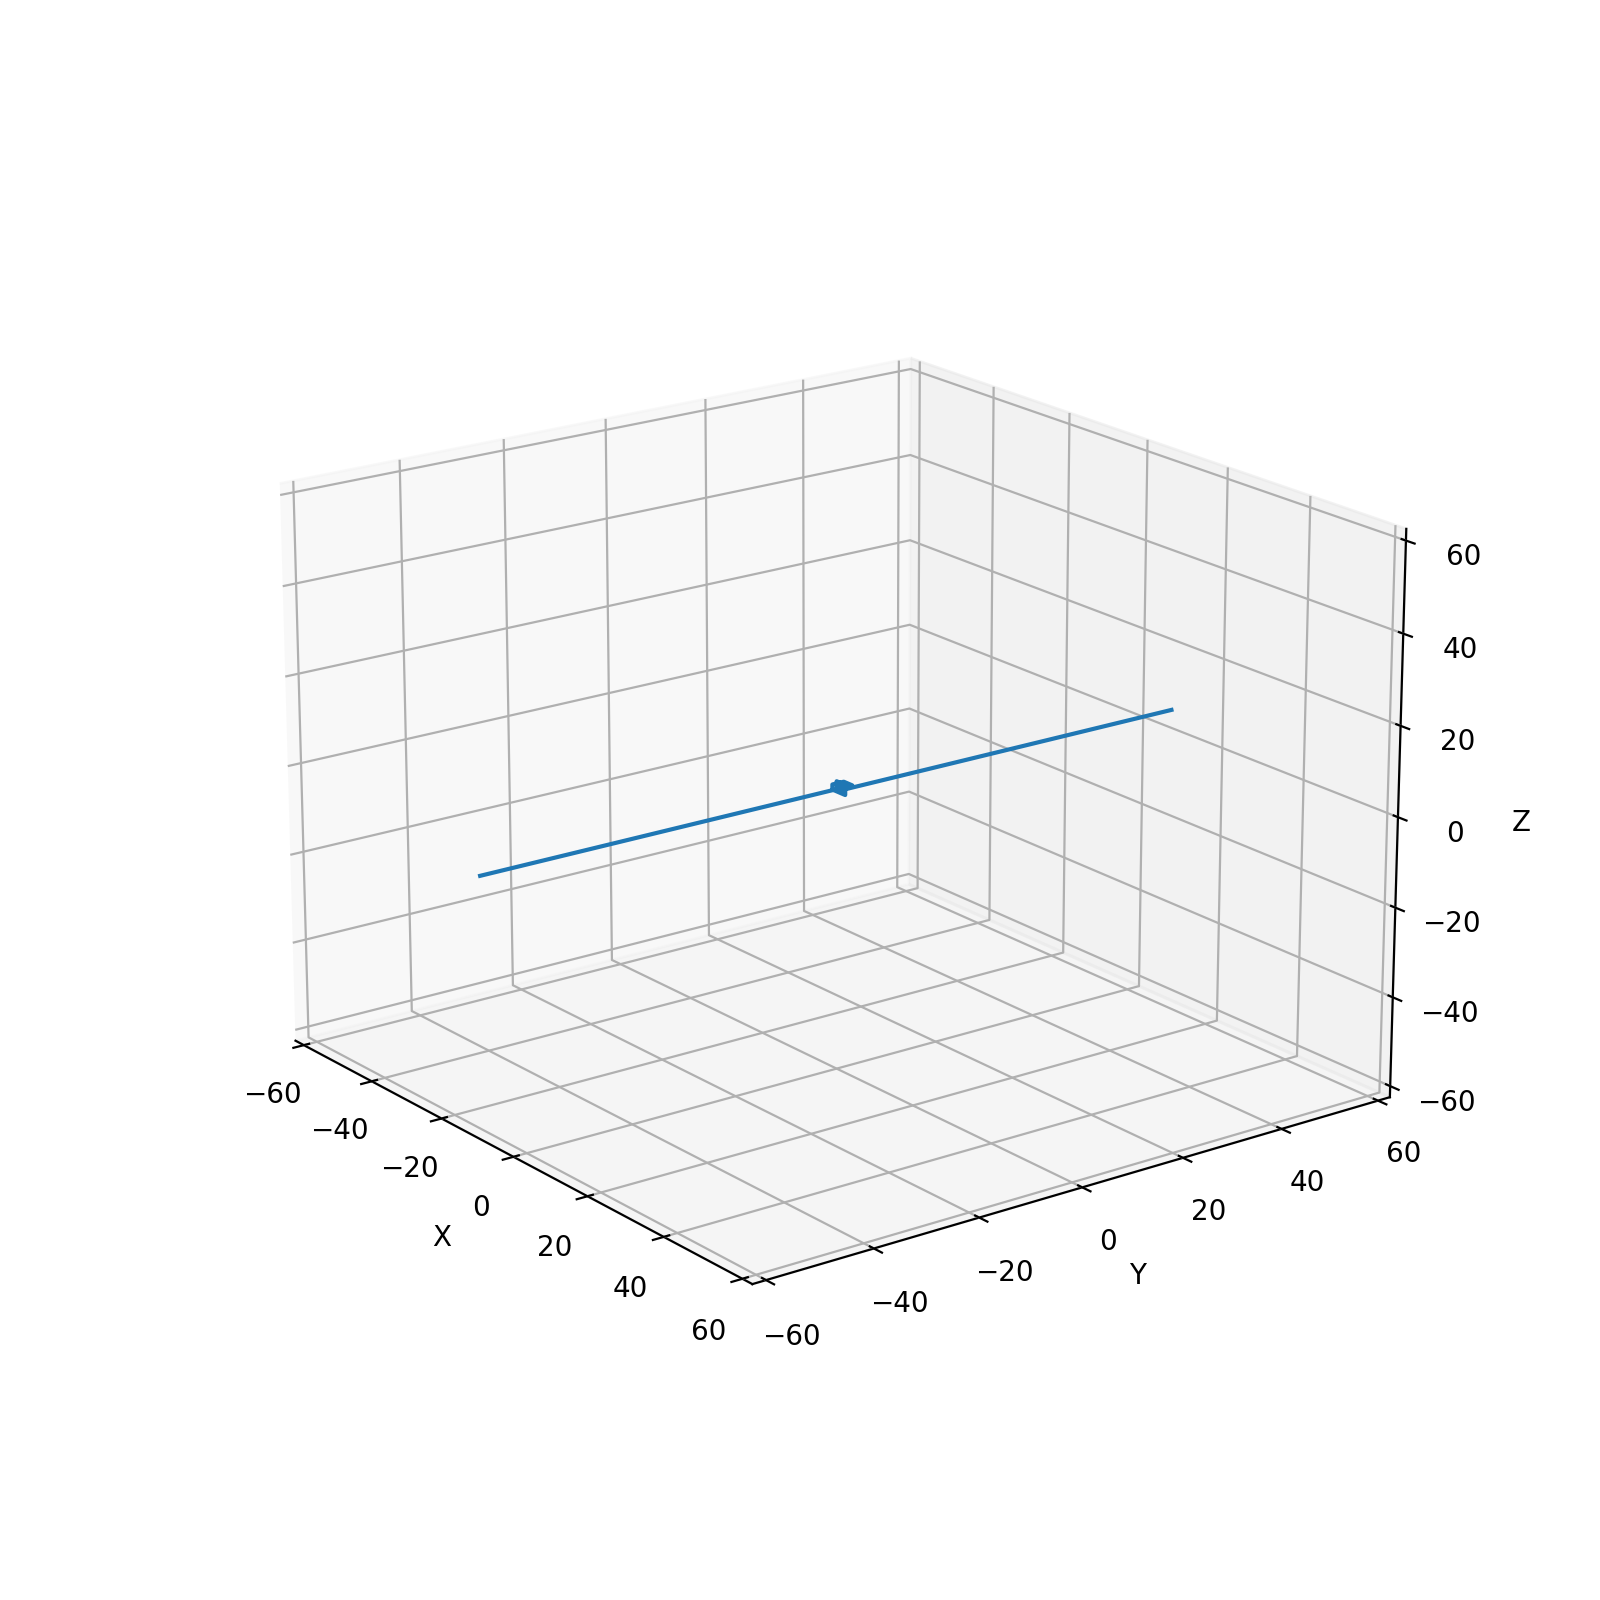

[(-60.0, 60.0), Text(0.5, 0, 'Z')]

In [15]:
tightcoord=np.loadtxt('139bp/seed2/tref_latt.txt')

%matplotlib notebook

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.plot(tightcoord[:, 0], tightcoord[:, 1], tightcoord[:, 2])
ax.set(xlim3d=(-60, 60), xlabel='X')
ax.set(ylim3d=(-60, 60), ylabel='Y')
ax.set(zlim3d=(-60, 60), zlabel='Z')

# Reading, processing datafiles + making xyz file for VMD

In [16]:
def gen_data(filename, bp):
    with open(filename, 'r') as f:
        lines=f.readlines()
    lines=lines[bp+3:]
    lines=[x.strip() for x in lines]
    for idx, line in enumerate(lines):
        line=line.replace('-', ' -')
        temp=line.split()        
        if len(temp)==3:
            lines[idx]=[float(x) for x in temp]
    return lines

## Plotting Trefoil on Tight Chain

In [17]:
bp=139

#seed=np.random.randint(1,11)
#print('seed is ', seed)

seed=3
datafolder='/Users/souradeep/Coding/dnaknots/139bp/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.240_139_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, bp)

#'/Users/souradeep/Coding/dnaknots/99bp_loose_LJfree/seed1/'

xyzfile=open(datafolder+'seed{}.xyz'.format(seed), 'w')
xyzfile.write('{}\n'.format(bp))
for line in lines:
    if 'continue' in line:
        xyzfile.write('{}\n'.format(bp))
    elif type(line)==str:
        xyzfile.write('\n')
    else:
        line=[str(elem) for elem in line]
        line.insert(0, 'C')
        xyzfile.write('\t'.join(line))
        xyzfile.write('\n')    
xyzfile.close()

In [18]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=1000
    bp=139
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-60, 60), xlabel='X')
ax.set(ylim3d=(-20, 20), ylabel='Y')
ax.set(zlim3d=(-60, 60), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(15, -15)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=range(1,50), fargs=(lines, line), interval=20)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_dna_long.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

<IPython.core.display.Javascript object>

## Plotting Trefoil on Loose Chain (confined)

In [19]:
#seed=np.random.randint(1,11)
#print('seed is ', seed)
seed=7
datafolder='/Users/souradeep/Coding/dnaknots/99bp_loose_LJconf/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.245_99bp_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, 99)

#'/Users/souradeep/Coding/dnaknots/99bp_loose_LJfree/seed1/'

xyzfile=open(datafolder+'seed{}.xyz'.format(seed), 'w')
xyzfile.write('99\n')
for line in lines:
    if 'continue' in line:
        xyzfile.write('99\n')
    elif type(line)==str:
        xyzfile.write('\n')
    else:
        line=[str(elem) for elem in line]
        line.insert(0, 'C')
        xyzfile.write('\t'.join(line))
        xyzfile.write('\n')    
xyzfile.close()

In [20]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=1000
    bp=99
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-40, 40), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-40, 40), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(15, -15)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=range(200,300), fargs=(lines, line), interval=10)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_dna_long.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

<IPython.core.display.Javascript object>

## Plotting Trefoil on Loose Chain (open)

In [21]:
seed=7
datafolder='/Users/souradeep/Coding/dnaknots/99bp_loose_LJfree/seed{}/'.format(seed)
moviedat=datafolder+'traj_0.000_0.245_99bp_dt0.005_topo_endfree.dat'
lines=gen_data(moviedat, 99)

#'/Users/souradeep/Coding/dnaknots/99bp_loose_LJfree/seed1/'

xyzfile=open(datafolder+'seed{}.xyz'.format(seed), 'w')
xyzfile.write('99\n')
for line in lines:
    if 'continue' in line:
        xyzfile.write('99\n')
    elif type(line)==str:
        xyzfile.write('\n')
    else:
        line=[str(elem) for elem in line]
        line.insert(0, 'C')
        xyzfile.write('\t'.join(line))
        xyzfile.write('\n')    
xyzfile.close()

In [22]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=1000
    bp=99
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(1)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-40, 40), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-40, 40), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(15, -15)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=10000, fargs=(lines, line), interval=0.001)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_dna_long.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

<IPython.core.display.Javascript object>

### This simulation has 99 beads, stuck between two walls situated on two XZ-planes. There are a total of 10000 frames (~ 10^7 timesteps of evolution).

# Plotting the animation

<IPython.core.display.Javascript object>


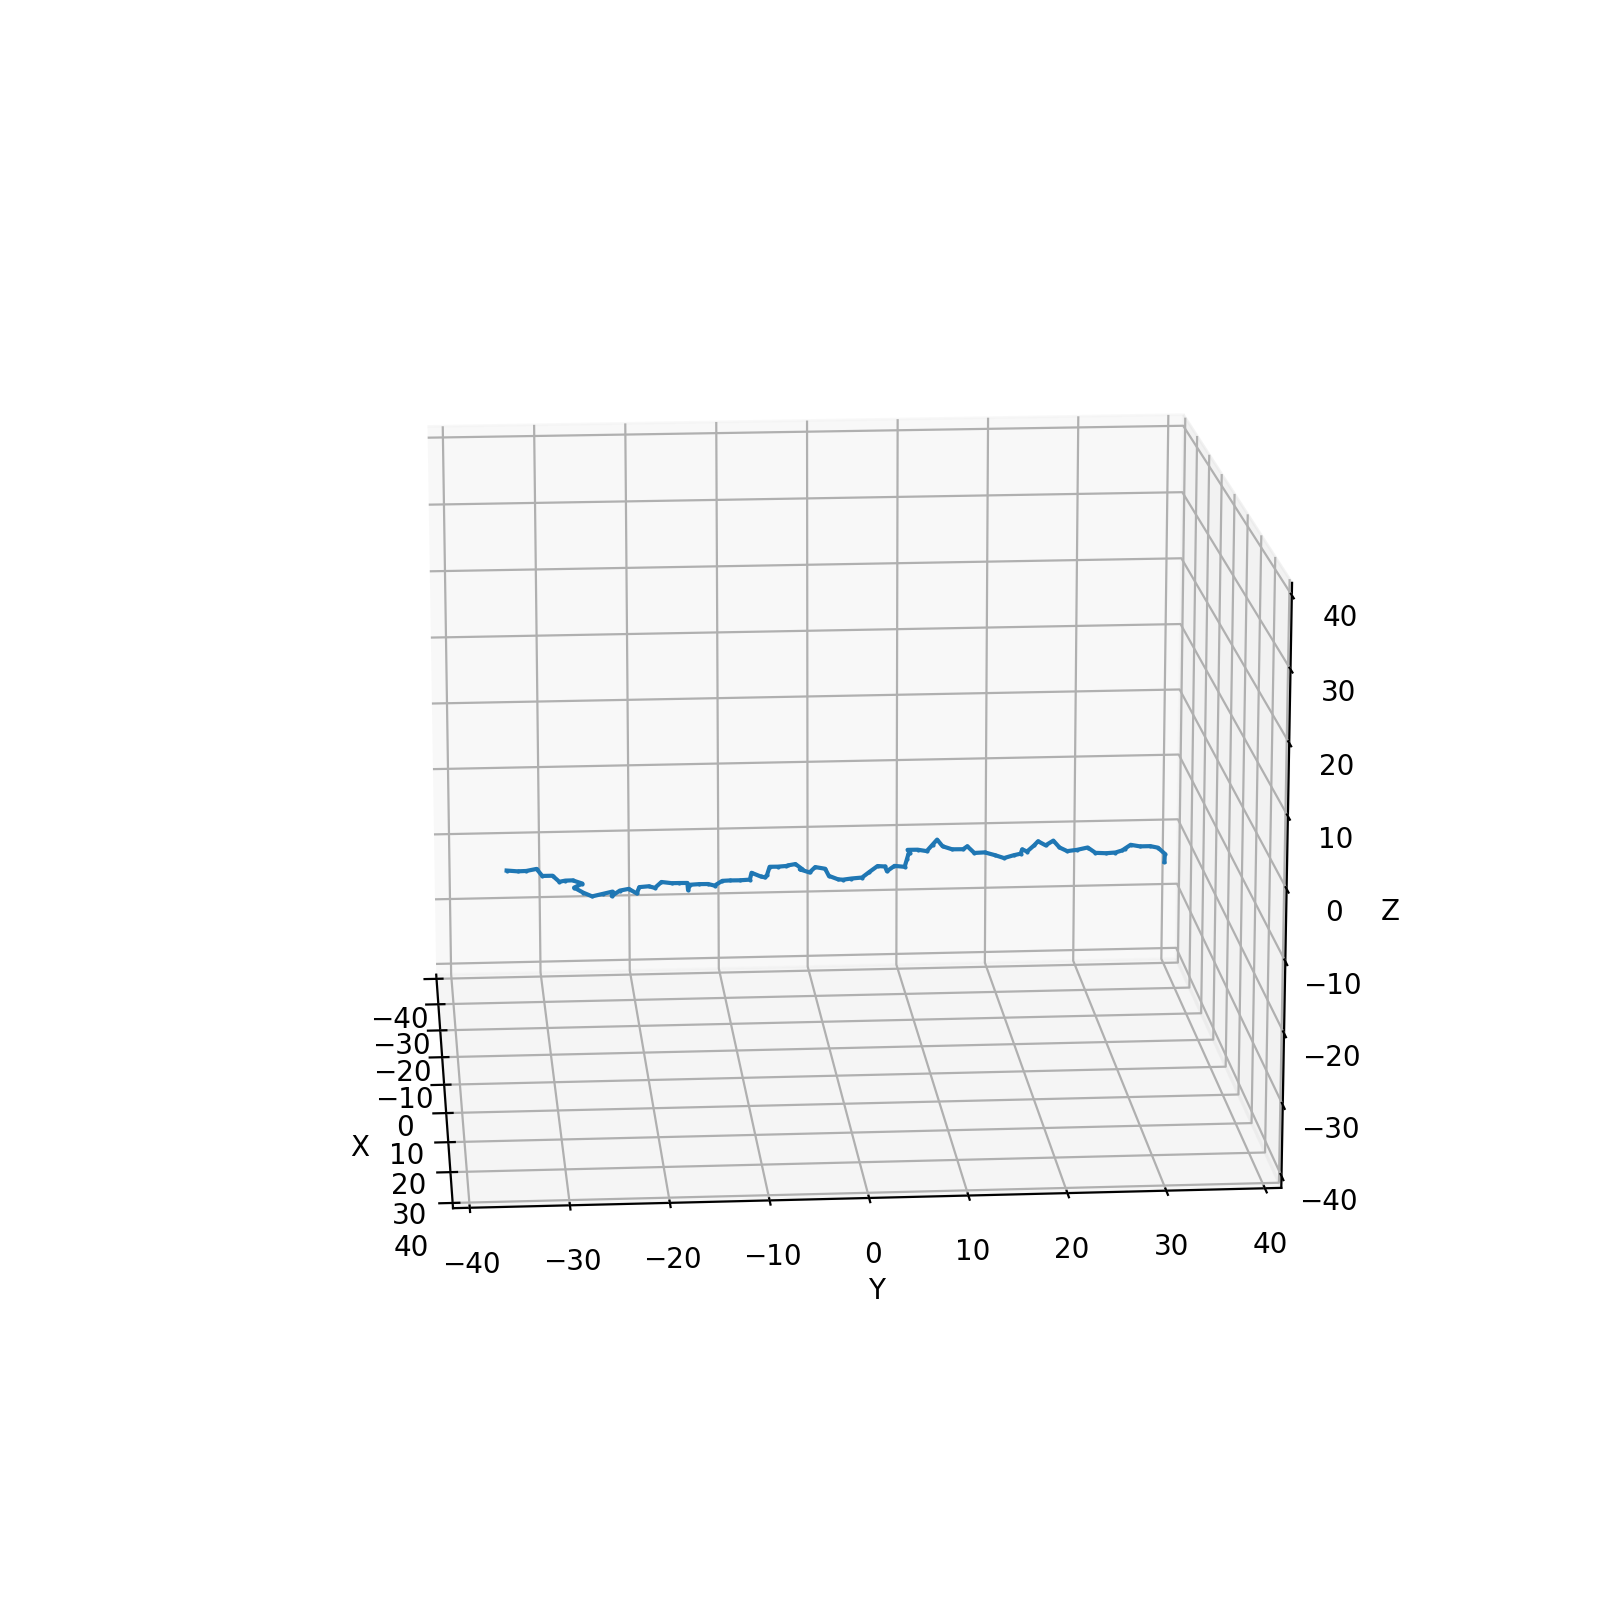

In [20]:
%matplotlib notebook

def update_coords(i, lines, line):
    iters=1000
    bp=99
    elem=str(iters*(i+1))
    idx=lines.index(elem)+1
    piece=np.array(lines[idx:idx+bp])
    line.set_data(piece[:, 0], piece[:, 1])
    line.set_3d_properties(piece[:, 2])
    line.set_linestyle('-')
    line.set_marker('o')
    line.set_markersize(0.5)
    return line

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

line=ax.plot([], [], [])[0]
ax.set(xlim3d=(-40, 40), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-40, 40), zlabel='Z')
#above three lines sets the limits on x, y, z coordinates visualized. 
ax.view_init(15, -15)
#this line sets the initial angle of viewing, two parameters are elevation angle and azimuthal angle. 

ani = animation.FuncAnimation(
    fig, update_coords, frames=10000, fargs=(lines, line), interval=1)
# Frames = total number of frames to plot, interval = time interval between two frames in ms
#change as required

#ani.save('knot_dna_long.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#above line if uncommented renders a video of the simulation

plt.show()

# Scanning to Locate and Track the Knot

In [12]:
lines[:100]

['1000',
 [1.122, -34.796, -10.102],
 [1.216, -33.66, -10.392],
 [1.139, -32.476, -10.446],
 [1.064, -31.41, -10.719],
 [1.12, -30.206, -10.523],
 [1.475, -29.164, -10.861],
 [1.375, -28.057, -10.699],
 [1.259, -26.928, -10.565],
 [1.474, -25.923, -10.725],
 [1.29, -24.813, -10.402],
 [1.189, -23.711, -10.09],
 [0.898, -22.604, -10.254],
 [0.984, -21.481, -10.022],
 [1.571, -20.541, -9.943],
 [1.569, -19.42, -9.903],
 [1.711, -18.421, -9.729],
 [1.874, -17.294, -9.547],
 [1.753, -16.351, -10.011],
 [1.475, -15.23, -9.785],
 [1.208, -14.23, -9.956],
 [1.248, -13.47, -9.117],
 [1.689, -14.029, -8.366],
 [1.446, -13.259, -7.629],
 [1.263, -13.172, -6.514],
 [1.007, -12.685, -5.536],
 [0.983, -12.887, -4.496],
 [0.473, -12.989, -3.418],
 [1.173, -12.907, -2.516],
 [1.111, -12.586, -1.407],
 [1.185, -11.644, -0.913],
 [0.592, -10.965, -0.218],
 [1.226, -10.802, 0.669],
 [0.727, -9.965, 0.439],
 [0.739, -8.872, 0.628],
 [0.763, -7.752, 0.888],
 [1.312, -6.821, 1.164],
 [0.891, -5.918, 1.556]